# Aprendizado de máquina: Agrupamento

![1](https://github.com/alvaromfcunha-c210/aula4/blob/master/imagens/1.png?raw=1)

### Método K-Means:

O método K-Means funciona da seguinte forma:

- É escolido o numero de agrupamentos (clusters), que é o valor de K;
- O algoritimo posiciona aleatoriamente centroides de acordo com K;
- As centroides por iteração são reposicionadas para se obter a menor distancia entre dados do mesmo agrupamento.

![2](https://github.com/alvaromfcunha-c210/aula4/blob/master/imagens/2.jpg?raw=1)

### Criação dos dados:

In [1]:
from sklearn.datasets import make_blobs

data, labels = make_blobs(n_samples=400, n_features=2, centers=3, cluster_std=0.5, shuffle=True)

### Visualização dos dados:

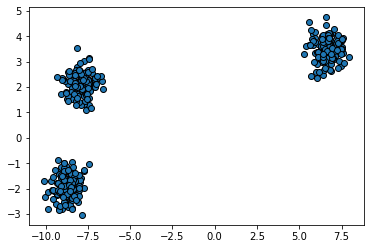

In [2]:
import matplotlib.pyplot as plt

plt.scatter(data[:, 0], data[:, 1], edgecolors='black')
plt.show()

### Treinamento do modelo:

In [19]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(data)

print(len(data))
print(len(kmeans.labels_))

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


400
400


### Predição com os dados do treinamento:

In [4]:
predict = kmeans.predict(data)

centers = kmeans.cluster_centers_

g1 = data[predict == 0]
g2 = data[predict == 1]
g3 = data[predict == 2]

### Visualização dos dados preditos:

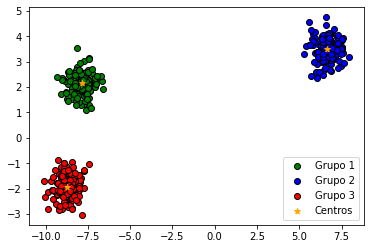

In [5]:
plt.scatter(g1[:, 0], g1[:, 1], c="green", label="Grupo 1", edgecolors='black')
plt.scatter(g2[:, 0], g2[:, 1], c="blue", label="Grupo 2", edgecolors='black')
plt.scatter(g3[:, 0], g3[:, 1], c="red", label="Grupo 3", edgecolors='black')
plt.scatter(centers[:, 0], centers[:, 1], c="orange", label="Centros", marker="*")

plt.legend(scatterpoints=1)

plt.show()

### Métodos avaliativos:

- Calinski-Harabasz Index: O índice CH (também conhecido como critério de razão de variância ) é uma medida de quão semelhante um objeto é ao seu próprio cluster (coesão) em comparação com outros clusters (separação). Quanto maior o valor, melhor a divisão.

- Silhouette Score: Pontuação de silueta baseado na média de distancias dentre dados do mesmo clusters e entre diferente clusters. Varia de -1 a 1 e quanto mais proximo de 1, melhor.

In [6]:
from sklearn.metrics import calinski_harabasz_score, silhouette_score

print('Calinski-Harabasz Index:', calinski_harabasz_score(data, kmeans.labels_))
print('Silhouette Score:', silhouette_score(data, kmeans.labels_))

Calinski-Harabasz Index: 23441.737799270053
Silhouette Score: 0.8428572905838714


### _**Mas como saber qual valor de K (clusters) usar para um determinado dataset?**_

### Elbow Method:

Vamos extrair métricas avaliativas de diferentes modelos K-Means com valores de K diferentes para decidir qual será o melhor. Através do grafico (Métrica x K) é possivel inferir o valor de K através do menor ponto onde a hipérbole tende a se manter constante.

### Importando dataset:

In [7]:
import pandas as pd
# data = pd.read_csv('clustering_data.csv', sep=';')

import io
from google.colab import files

uploaded = files.upload()
file = io.BytesIO(uploaded['clustering_data.csv'])
data2 = pd.read_csv(file, sep=';')

data2.head()

Saving clustering_data.csv to clustering_data.csv


,f1,f2
0,0.018637,8.964998
1,-5.737664,-1.860687
2,-4.195087,-4.641740
3,8.021220,-4.016667
4,-1.403076,5.093363


### Tratamento dos dados:

In [8]:
# Exclusão dos elementos inválidos ('NaN' ou 'None'):

print("Total de dados:", len(data2))
display(data2.isna().any())
data2 = data2.dropna()
print("Total de dados:", len(data2))

Total de dados: 2297


f1    True
f2    True
dtype: bool

Total de dados: 1703


### Visualização:

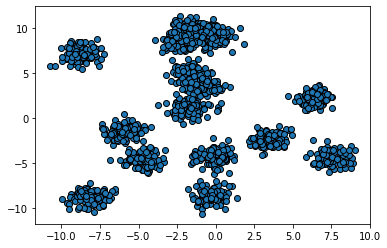

In [9]:
plt.scatter(data2["f1"], data2["f2"], edgecolors='black')
plt.show()

### Elbow Method:

In [ ]:
import numpy as np

data2 = np.array(data2)

em = []
ss = []
chi = []

for i in range(1, 21):
    km = KMeans(n_clusters=i)
    km.fit(data2)
    if(i > 1):
      ss.append(silhouette_score(data2, km.labels_))
      chi.append(calinski_harabasz_score(data2, km.labels_))
    em.append(km.inertia_)

![3](https://github.com/alvaromfcunha-c210/aula4/blob/master/imagens/3.png?raw=1)

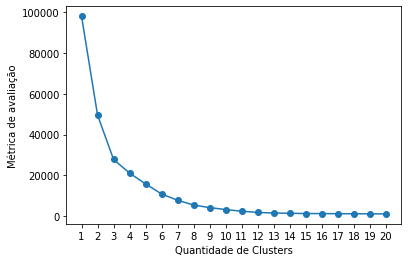

In [11]:
plt.plot(range(1, 21), em, marker='o')
plt.xlabel("Quantidade de Clusters")
plt.ylabel("Métrica de avaliação")
plt.xticks(range(1, 21))

plt.show()

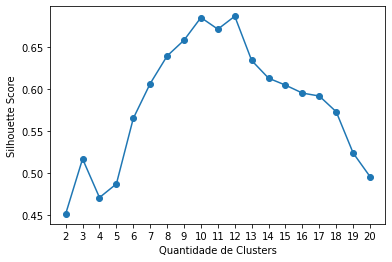

In [25]:
plt.plot(range(2, 21), ss, marker='o')
plt.xlabel("Quantidade de Clusters")
plt.ylabel("Silhouette Score")
plt.xticks(range(2, 21))

plt.show()

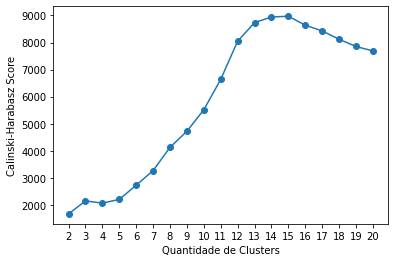

In [26]:
plt.plot(range(2, 21), chi, marker='o')
plt.xlabel("Quantidade de Clusters")
plt.ylabel("Calinski-Harabasz Score")
plt.xticks(range(2, 21))

plt.show()

### Treinando modelo com valor inferido:

In [12]:
kmeans2 = KMeans(n_clusters=13)
kmeans2.fit(data2)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=13)

### Predição e visualização:

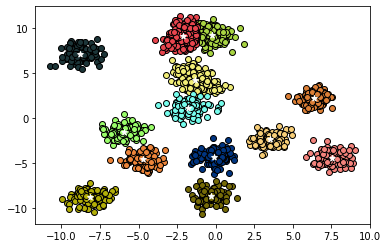

In [13]:
predict2 = kmeans2.predict(data2)

centers2 = kmeans2.cluster_centers_

for i in range(13):
    g = data2[predict2 == i]
    plt.scatter(g[:,0] ,g[:,1], c=np.random.rand(3), edgecolors='black')
    
plt.scatter(centers2[:, 0], centers2[:, 1], c="white", marker="*")

plt.show()

### Avaliando modelo:

In [14]:
print('Calinski-Harabasz Index:', calinski_harabasz_score(data2, kmeans2.labels_))
print('Silhouette Score:', silhouette_score(data2, kmeans2.labels_))

Calinski-Harabasz Index: 8735.775593602539
Silhouette Score: 0.6346199908350174
